# WHO WILL BE THE NEXT STAR? 
# An Analysis of the Top 200 Streamed Songs on Spotify from 2017 to 2022 in the Philippines

### Author: Dleamnor Euraze M. Cawaling 
*Fresh Graduate in BS in Computer Science | Aspiring Data Scientist*

**Date Created:** August 2023

**Resources**

Dataset
https://www.kaggle.com/datasets/jcacperalta/spotify-daily-top-200-ph

Metadata:
https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Client Story

Roxette, a Filipino-Korean music producer, wants to settle back in Manila after studying overseas. She is planning to invest her time and money in the Philippine music scene in whatever capacity. She wants to understand if there’s a specific type of music, specific artist that she should focus her efforts on. She also wanted to analyze if there was a change in music choices from 2017 - 2022. 

## Objectives

Based on the client story, the following are the objectives in Data Analysis:

1. Identify if there is a specific type of music the client should focus her efforts on.
   - Identify the Most Trending Genres in 2022
2. Identify if there is a specific type of artist the client should focus her efforts on.
   - Identify the Most Popular Artists, and identify their genres
3. Identify if there is a change in music choices from 2017 - 2022. 
   - Create a trend line for music choices/genres

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Loading and Exploring the Datasets

In [2]:
### Load the datasets

daily_charts = pd.read_csv("ph_spotify_daily_charts.csv", index_col = 0)
daily_charts_tracks = pd.read_csv("ph_spotify_daily_charts_tracks.csv", index_col = 0)
daily_charts_artists = pd.read_csv("ph_spotify_daily_charts_artists.csv", index_col = 0)

daily_charts.reset_index(drop=False, inplace=True)  # Reset the index and keep track_id as a column
daily_charts_tracks.reset_index(drop=False, inplace=True)  # Reset the index and keep track_id as a column
daily_charts_artists.reset_index(drop=False, inplace=True)  # Reset the index and keep artist_id as a column


### *Spotify Daily Charts*

**Observation:** The ph_spotify_daily_charts contains the tracks with their positions (1-200) in the daily chart (every day) from 2017 to 2023. There are duplicates in the track_name because some tracks are listed multiple times in daily tracks.

There are 456201 rows in this table. The number of unique track_id is 4770, however for the track_name it is 3661. This means that there are similar name of track/song however the songs are totally unique because the artists names are different. With this, we cannot use the track_name to uniquely distinguish the song instead we will use the track_id.

In [3]:
daily_charts.head(10)

date  position                track_id  \
0  01/01/2017         1  0kN8xEmgMW9mh7UmDYHlJP   
1  01/01/2017         2  5uCax9HTNlzGybIStD3vDh   
2  01/01/2017         3  7BKLCZ1jbUBVqRi2FVlTVw   
3  01/01/2017         4  2rizacJSyD9S1IQUxUxnsK   
4  01/01/2017         5  5MFzQMkrl1FOOng9tq6R9r   
5  01/01/2017         6  6b8Be6ljOzmkOmFslEb23P   
6  01/01/2017         7  1qOLh0tI7trd1zdDKxYZTe   
7  01/01/2017         8  5hYTyyh2odQKphUbMqc5gN   
8  01/01/2017         9  4pdPtRcBmOSQDlJ3Fk945m   
9  01/01/2017        10  5aAx2yezTd8zXrkmtKl66Z   

                       track_name            artist  streams  
0            Versace on the Floor        Bruno Mars   185236  
1            Say You Won't Let Go      James Arthur   180552  
2                          Closer  The Chainsmokers   158720  
3                     All We Know  The Chainsmokers   130874  
4                Don't Wanna Know          Maroon 5   129656  
5                       24K Magic        Bruno Mars   123924  
6                        Starving  Hailee Steinfeld   123786  
7  How Far I'll Go - From "Moana"      Alessia Cara   107298  
8                 Let Me Love You          DJ Snake   104960  
9                         Starboy        The Weeknd   104708

In [4]:
### Spotify Daily Charts Info
daily_charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456201 entries, 0 to 456200
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        456201 non-null  object
 1   position    456201 non-null  int64 
 2   track_id    456201 non-null  object
 3   track_name  456191 non-null  object
 4   artist      456191 non-null  object
 5   streams     456201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


### *Spotify Daily Charts Track*

**Observation:** The ph_spotify_daily_charts_track contains the information about the songs/tracks. There are duplicates in the track_names because some tracks are released multiple times (different release date), with this the track_id is also different. 

There are 4768 rows in this table. The number of unique track_id is 4768, however for the track_name it is 3648 since as mentioned above,  there are similar name of track/song however the artists names are different.

In [5]:
daily_charts_tracks.head(10)

track_id                      track_name  \
0  0kN8xEmgMW9mh7UmDYHlJP            Versace on the Floor   
1  5uCax9HTNlzGybIStD3vDh            Say You Won't Let Go   
2  7BKLCZ1jbUBVqRi2FVlTVw                          Closer   
3  2rizacJSyD9S1IQUxUxnsK                     All We Know   
4  5MFzQMkrl1FOOng9tq6R9r                Don't Wanna Know   
5  6b8Be6ljOzmkOmFslEb23P                       24K Magic   
6  1qOLh0tI7trd1zdDKxYZTe                        Starving   
7  5hYTyyh2odQKphUbMqc5gN  How Far I'll Go - From "Moana"   
8  4pdPtRcBmOSQDlJ3Fk945m                 Let Me Love You   
9  5aAx2yezTd8zXrkmtKl66Z                         Starboy   

                artist_id       artist_name                album_id  duration  \
0  0du5cEVh5yTK9QJze8zA0C        Bruno Mars  4PgleR09JVnm3zY1fW3XBA    261240   
1  4IWBUUAFIplrNtaOHcJPRM      James Arthur  7oiJYvEJHsmYtrgviAVIBD    211466   
2  69GGBxA162lTqCwzJG5jLp  The Chainsmokers  0rSLgV8p5FzfnqlEk4GzxE    244960   
3  69GGBxA162lTqCwzJG5jLp  The Chainsmokers  0xmaV6EtJ4M3ebZUPRnhyb    194080   
4  04gDigrS5kc9YWfZHwBETP          Maroon 5  0fvTn3WXF39kQs9i3bnNpP    214480   
5  0du5cEVh5yTK9QJze8zA0C        Bruno Mars  4PgleR09JVnm3zY1fW3XBA    225983   
6  5p7f24Rk5HkUZsaS3BLG5F  Hailee Steinfeld  3Nuw6arrA8kVwhIvyGbiku    181880   
7  2wUjUUtkb5lvLKcGKsKqsR      Alessia Cara  25IBuKrmZbgOVCGNigTXar    175517   
8  540vIaP2JwjQb9dm3aArA4          DJ Snake  55bbXORm6ZrVq52zfZnxBf    205946   
9  1Xyo4u8uXC1ZmMpatF05PJ        The Weeknd  09fggMHib4YkOtwQNXEBII    230453   

  release_date  popularity  danceability  energy   key  loudness  mode  \
0   17/11/2016          75         0.578   0.574   2.0    -6.209   1.0   
1   28/10/2016          87         0.358   0.557  10.0    -7.398   1.0   
2   29/07/2016          85         0.748   0.524   8.0    -5.599   1.0   
3   29/09/2016          71         0.662   0.586   0.0    -8.821   1.0   
4   11/10/2016           0         0.783   0.623   7.0    -6.126   1.0   
5   17/11/2016          79         0.818   0.803   1.0    -4.282   1.0   
6   15/07/2016           0         0.636   0.633   4.0    -4.230   1.0   
7   28/10/2016           0         0.314   0.555   9.0    -9.601   1.0   
8   05/08/2016           0         0.476   0.718   8.0    -5.309   1.0   
9   25/11/2016           0         0.681   0.594   7.0    -7.028   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  
0       0.0454        0.1960          0.000000    0.0830    0.301  174.152  
1       0.0590        0.6950          0.000000    0.0902    0.494   85.043  
2       0.0338        0.4140          0.000000    0.1110    0.661   95.010  
3       0.0307        0.0970          0.002720    0.1150    0.296   90.000  
4       0.0800        0.3380          0.000000    0.0975    0.447  100.048  
5       0.0797        0.0340          0.000000    0.1530    0.632  106.970  
6       0.1260        0.3710          0.000000    0.1020    0.512   99.721  
7       0.3700        0.1570          0.000108    0.0670    0.159  179.666  
8       0.0576        0.0784          0.000010    0.1220    0.142  199.864  
9       0.2820        0.1650          0.000003    0.1340    0.535  186.054

In [6]:
### Spotify Daily Charts Tracks Info
daily_charts_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


### *Spotify Daily Charts Artist*

**Observation:** The ph_spotify_daily_charts_artists contains the information about the artists. It includes artist's total followers, genres and popularity. All artist_id and artist_name are unique.

There are 988 rows in this table. The number of unique artist_id and artist name is 988.

In [7]:
daily_charts_artists.head(10)

artist_id       artist_name  total_followers  \
0  0du5cEVh5yTK9QJze8zA0C        Bruno Mars         47387027   
1  4IWBUUAFIplrNtaOHcJPRM      James Arthur         11471232   
2  69GGBxA162lTqCwzJG5jLp  The Chainsmokers         20036566   
3  04gDigrS5kc9YWfZHwBETP          Maroon 5         40125006   
4  5p7f24Rk5HkUZsaS3BLG5F  Hailee Steinfeld          8535540   
5  2wUjUUtkb5lvLKcGKsKqsR      Alessia Cara         11318666   
6  540vIaP2JwjQb9dm3aArA4          DJ Snake          8442843   
7  1Xyo4u8uXC1ZmMpatF05PJ        The Weeknd         62316373   
8  46GXASE9LHzyssNqKOInUu             Dawin           226027   
9  738wLrAtLtCtFOLvQBXOXp       Major Lazer          6344896   

                                              genres  popularity  
0                               ['dance pop', 'pop']          89  
1                   ['pop', 'talent show', 'uk pop']          82  
2  ['dance pop', 'edm', 'electropop', 'pop', 'pop...          81  
3                                            ['pop']          86  
4              ['dance pop', 'pop', 'post-teen pop']          73  
5  ['canadian contemporary r&b', 'canadian pop', ...          75  
6  ['dance pop', 'edm', 'electronic trap', 'pop',...          78  
7  ['canadian contemporary r&b', 'canadian pop', ...          98  
8                                        ['nyc pop']          51  
9  ['dance pop', 'edm', 'electro house', 'moombah...          76

In [8]:
### Spotify Daily Charts Artists Info
daily_charts_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


## Preprocessing the Data

### *Handling Missing Values*

**For Daily Charts**

In [9]:
# Checking for missing values
daily_charts.isnull().sum()

date           0
position       0
track_id       0
track_name    10
artist        10
streams        0
dtype: int64

In [10]:
# Drop rows with missing values
daily_charts = daily_charts.dropna()
daily_charts.shape

(456191, 6)

**For Daily Charts Tracks**

In [11]:
# Checking for missing values
daily_charts_tracks.isnull().sum()

track_id            0
track_name          5
artist_id           0
artist_name         5
album_id            0
duration            0
release_date        0
popularity          0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
dtype: int64

In [12]:
# Drop rows with missing values
daily_charts_tracks = daily_charts_tracks.dropna()
daily_charts_tracks.shape

(4762, 19)

**For Daily Charts Artists**

In [13]:
# Checking for missing values
daily_charts_artists.isnull().sum()

artist_id          0
artist_name        0
total_followers    0
genres             0
popularity         0
dtype: int64

### *Checking if there are duplicated rows*

In [14]:
# Check for duplicates in Daily Charts 
daily_charts.duplicated().sum()

0

In [15]:
# Check for duplicates in Daily Charts Tracks
daily_charts_tracks.duplicated().sum()

0

In [16]:
# Check for duplicates in Daily Charts Artists
daily_charts_artists.duplicated().sum()

0

### *Filtering the data from 2017 to 2023 (Daily Charts)*

In [17]:
# Convert date to datetime format
daily_charts['date'] = pd.to_datetime(daily_charts['date'], errors='coerce')

# Extract the year from the 'date' column
daily_charts['year'] = daily_charts['date'].dt.year

# Filter data for years 2017 to 2022
start_year = 2017
end_year = 2022
filtered_daily_charts = daily_charts[
    (daily_charts['date'].dt.year >= start_year) &
    (daily_charts['date'].dt.year <= end_year)
]

filtered_daily_charts.head(10)

date  position                track_id  \
0 2017-01-01         1  0kN8xEmgMW9mh7UmDYHlJP   
1 2017-01-01         2  5uCax9HTNlzGybIStD3vDh   
2 2017-01-01         3  7BKLCZ1jbUBVqRi2FVlTVw   
3 2017-01-01         4  2rizacJSyD9S1IQUxUxnsK   
4 2017-01-01         5  5MFzQMkrl1FOOng9tq6R9r   
5 2017-01-01         6  6b8Be6ljOzmkOmFslEb23P   
6 2017-01-01         7  1qOLh0tI7trd1zdDKxYZTe   
7 2017-01-01         8  5hYTyyh2odQKphUbMqc5gN   
8 2017-01-01         9  4pdPtRcBmOSQDlJ3Fk945m   
9 2017-01-01        10  5aAx2yezTd8zXrkmtKl66Z   

                       track_name            artist  streams    year  
0            Versace on the Floor        Bruno Mars   185236  2017.0  
1            Say You Won't Let Go      James Arthur   180552  2017.0  
2                          Closer  The Chainsmokers   158720  2017.0  
3                     All We Know  The Chainsmokers   130874  2017.0  
4                Don't Wanna Know          Maroon 5   129656  2017.0  
5                       24K Magic        Bruno Mars   123924  2017.0  
6                        Starving  Hailee Steinfeld   123786  2017.0  
7  How Far I'll Go - From "Moana"      Alessia Cara   107298  2017.0  
8                 Let Me Love You          DJ Snake   104960  2017.0  
9                         Starboy        The Weeknd   104708  2017.0

### *Separating genres in Artist Table*

In [18]:
# Separating genres since the genres column has multiple genres per artist. 
# In this way, our analysis of genre would be more accurate.

genre_data = []
for index, row in daily_charts_artists.iterrows():
    artist_id = row['artist_id']
    artist_name = row['artist_name']
    total_followers = row['total_followers']
    popularity = row['popularity']
    
    # Remove brackets and apostrophes from genre lists
    cleaned_genres = row['genres'][2:-2].replace("'", "").split(', ')
   
    for genre in cleaned_genres:
        genre_data.append({'artist_id': artist_id, 'artist_name': artist_name, 'total_followers': total_followers, 'genre': genre, 'popularity':popularity})

# Create dataframe for genre analysis
daily_charts_artists_mod = pd.DataFrame(genre_data)
daily_charts_artists_mod

artist_id    artist_name  total_followers          genre  \
0     0du5cEVh5yTK9QJze8zA0C     Bruno Mars         47387027      dance pop   
1     0du5cEVh5yTK9QJze8zA0C     Bruno Mars         47387027            pop   
2     4IWBUUAFIplrNtaOHcJPRM   James Arthur         11471232            pop   
3     4IWBUUAFIplrNtaOHcJPRM   James Arthur         11471232    talent show   
4     4IWBUUAFIplrNtaOHcJPRM   James Arthur         11471232         uk pop   
...                      ...            ...              ...            ...   
2849  4GJ6xDCF5jaUqD6avOuQT6    FIFTY FIFTY           325207                  
2850  4NsbfTEC3nOcc0vOpZ1rRc      HELLMERRY            21845  pinoy hip hop   
2851  4NsbfTEC3nOcc0vOpZ1rRc      HELLMERRY            21845    tagalog rap   
2852  6UZ0ba50XreR4TM8u322gs          JISOO           655567                  
2853  7xj1YIDzHU6vkUwP76NEyx  Music Factory             7612        sped up   

      popularity  
0             89  
1             89  
2             82  
3             82  
4             82  
...          ...  
2849          77  
2850          54  
2851          54  
2852          75  
2853          64  

[2854 rows x 5 columns]

### Merge datasets

In [19]:
# Selecting specific columns from each dataset

charts_columns = ['track_id', 'streams', 'year']
tracks_columns = ['track_id', 'track_name', 'artist_id', 'popularity']
artists_columns = ['artist_id', 'artist_name', 'total_followers', 'genre', 'popularity']

In [20]:
# Merging the datasets to get relevant information
merged_df = pd.merge(
    filtered_daily_charts[charts_columns],
    daily_charts_tracks[tracks_columns],
    on="track_id",
    how="inner"
)

merged_df = pd.merge(
    merged_df,
    daily_charts_artists_mod[artists_columns],
    on="artist_id",
    how="inner",
    suffixes=('_track','_artists')
)

merged_df.columns

Index(['track_id', 'streams', 'year', 'track_name', 'artist_id',
       'popularity_track', 'artist_name', 'total_followers', 'genre',
       'popularity_artists'],
      dtype='object')

## Data Analysis

### Genre Analysis

In [21]:
# Genre Analysis
genre_analysis = merged_df.groupby(['genre', 'year']).agg({
    'streams': 'sum',
    'popularity_track': 'mean'
}).reset_index()

genre_analysis.head(10)

genre    year   streams  popularity_track
0                     2017.0   4452623         26.805128
1                     2018.0   1444821         54.824561
2                     2019.0   5081149         54.424460
3                     2020.0   5438129         40.843972
4                     2021.0   6795832         59.648649
5                     2022.0  68158823         65.739316
6  "childrens music"  2017.0     68633         77.000000
7     acoustic cover  2018.0    192345         28.111111
8       acoustic opm  2018.0    111775          8.000000
9       acoustic opm  2019.0   2128388          0.000000

In [22]:
genre_analysis['genre'].replace('', np.nan, inplace=True)
genre_analysis.dropna(subset=['genre'], inplace=True)

In [23]:
# Count empty strings in each column
empty_string_count = genre_analysis.apply(lambda x: (x == '').sum())

# Print the count of empty strings in each column
print("Count of empty strings in each column:")
print(empty_string_count)

Count of empty strings in each column:
genre               0
year                0
streams             0
popularity_track    0
dtype: int64


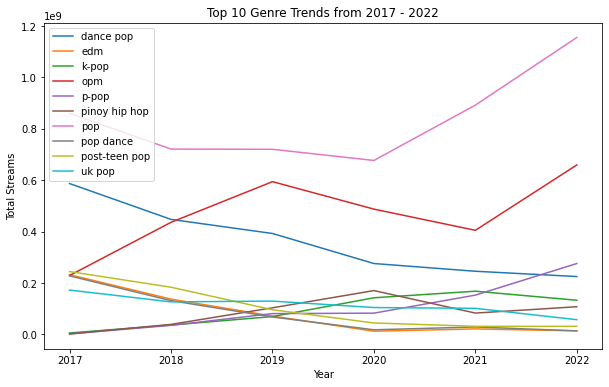

In [24]:
# Get the top 10 most popular genres
top_10_genres = merged_df.groupby('genre')['streams'].sum().nlargest(10).index

# Filter the genre_analysis DataFrame to include only the top 10 genres
top_10_genre_analysis = genre_analysis[genre_analysis['genre'].isin(top_10_genres)]

# Plotting Genre Trends for the top 10 genres
plt.figure(figsize=(10, 6))
for genre, genre_data in top_10_genre_analysis.groupby('genre'):
    plt.plot(genre_data['year'].to_numpy(), genre_data['streams'].to_numpy(), label=genre)

plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.title('Top 10 Genre Trends from 2017 - 2022')
plt.legend()
plt.show()

In [25]:
# Print the top 10 genres
print("Top 10 Genres Based on the Number of Streams:")
for index, genre in enumerate(top_10_genres, start=1):
    print(f"{index}. {genre}")

Top 10 Genres Based on the Number of Streams:
1. pop
2. opm
3. dance pop
4. uk pop
5. post-teen pop
6. p-pop
7. k-pop
8. pinoy hip hop
9. edm
10. pop dance


### Artist Analysis

In [26]:
# Top 10 most popular artists based on Artist Popularity
top_ten_artists = daily_charts_artists.groupby('artist_name')['popularity'].sum().sort_values(ascending=False)[:10]

print("Top 10 Most Popular Artists:")
top_ten_artists

Top 10 Most Popular Artists:


artist_name
Taylor Swift    100
Bad Bunny        98
The Weeknd       98
Drake            97
KAROL G          93
SZA              93
Eminem           92
21 Savage        92
Shakira          92
Lana Del Rey     92
Name: popularity, dtype: int64

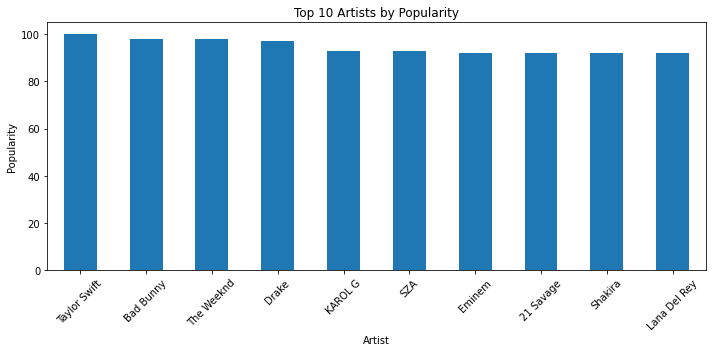

In [27]:
# Visualize artist popularity
plt.figure(figsize=(10, 5))
top_ten_artists.head(10).plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Artists by Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Top 10 most popular artists based on appearance of the tracks in the Daily Charts

top_ten_artists_daily = filtered_daily_charts.groupby("artist").count().sort_values(by="track_id", ascending=False)["track_id"][:10]
top_ten_artists_daily

artist
Ben&Ben             5245
Taylor Swift        4508
Ed Sheeran          4451
LANY                4069
Moira Dela Torre    3202
December Avenue     3124
Ariana Grande       2868
BTS                 2445
Lauv                2391
Bruno Mars          2379
Name: track_id, dtype: int64

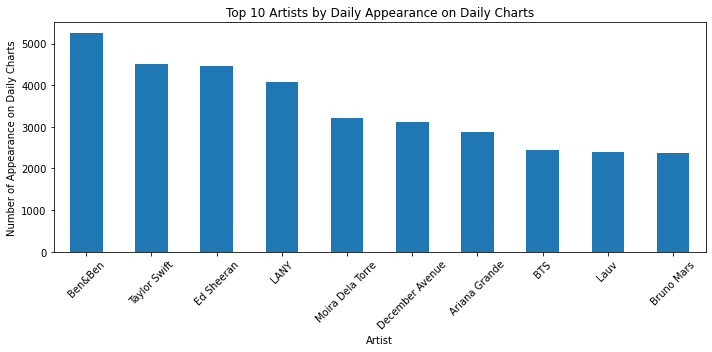

In [29]:
# Visualize artist appearance of the tracks in the Daily Charts
plt.figure(figsize=(10, 5))
top_ten_artists_daily.head(10).plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of Appearance on Daily Charts')
plt.title('Top 10 Artists by Daily Appearance on Daily Charts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Counting the Number of Top Artists for each genre


What I'm trying to do here is to count the number of top artists for each genre. This approach allows us to identify the dominant genres represented among the top artists.

In [30]:
# Extract artist names from both dataframes
top_artists_popularity = list(top_ten_artists.index)
top_artists_daily = list(top_ten_artists_daily.index)

# Combine artist names from both lists and remove duplicates
top_artist_names = list(set(top_artists_popularity + top_artists_daily))

genre_count = {}  # Initialize a dictionary to store genre counts

for genre in top_10_genres:
    genre_count[genre] = 0  # Initialize genre count for each genre
    
    # Iterate through top artist names
    for name in top_artist_names:
        artist = daily_charts_artists[daily_charts_artists['artist_name'] == name]
        if len(artist['genres'].values) > 0:
            # Update genre count for the current genre
            if genre in artist['genres'].values[0]:
                genre_count[genre] += 1

# Print the genre counts
for genre, count in genre_count.items():
    print(f"Genre: {genre}, Artist Count: {count}")


Genre: pop, Artist Count: 13
Genre: opm, Artist Count: 3
Genre: dance pop, Artist Count: 4
Genre: uk pop, Artist Count: 1
Genre: post-teen pop, Artist Count: 0
Genre: p-pop, Artist Count: 0
Genre: k-pop, Artist Count: 1
Genre: pinoy hip hop, Artist Count: 0
Genre: edm, Artist Count: 0
Genre: pop dance, Artist Count: 0


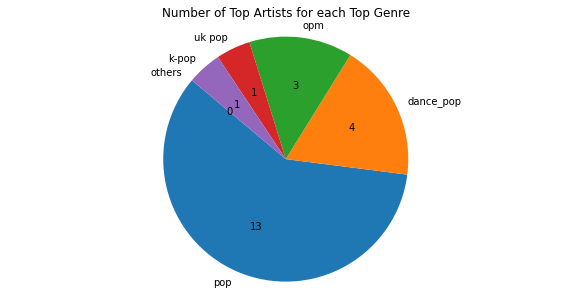

In [31]:
count = [13, 4, 3, 1, 1, 0]
top_genres = ['pop', 'dance_pop', 'opm', 'uk pop', 'k-pop', 'others']

# Create a pie chart
plt.figure(figsize=(10, 5))
plt.pie(count, labels=top_genres, startangle=140, autopct=lambda p: '{:.0f}'.format(p * sum(count) / 100))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Top Artists for each Top Genre")
plt.show()


## Results and Discussion

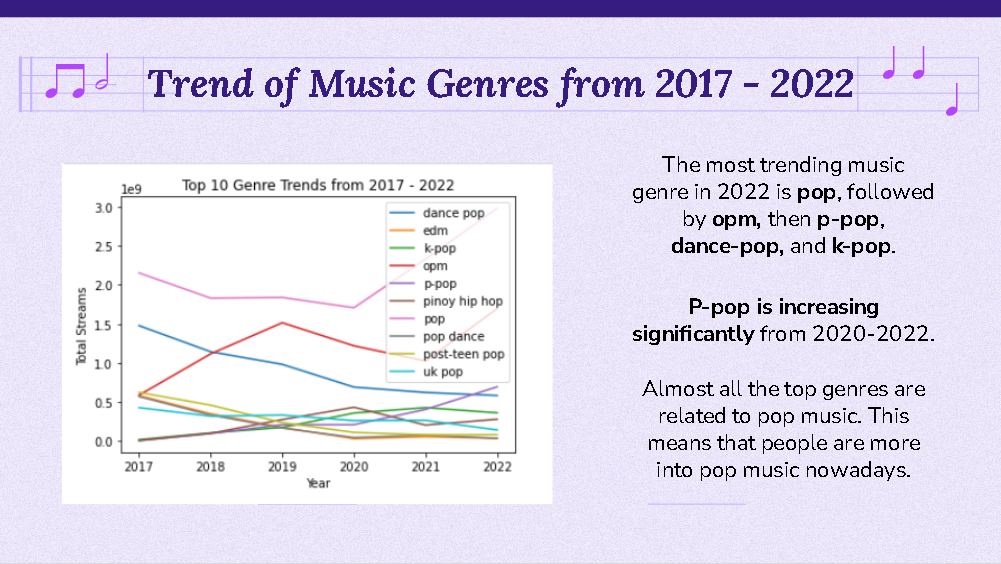

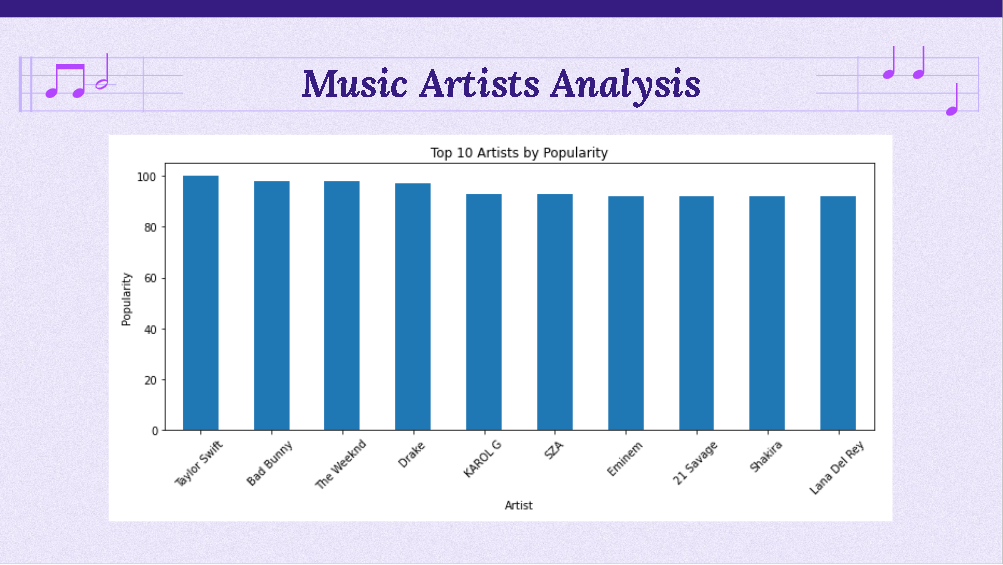

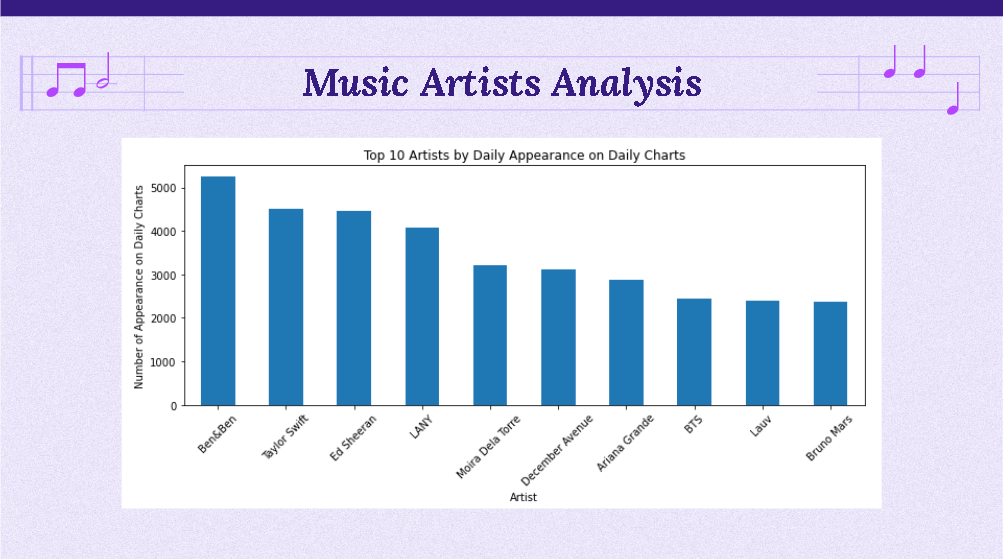

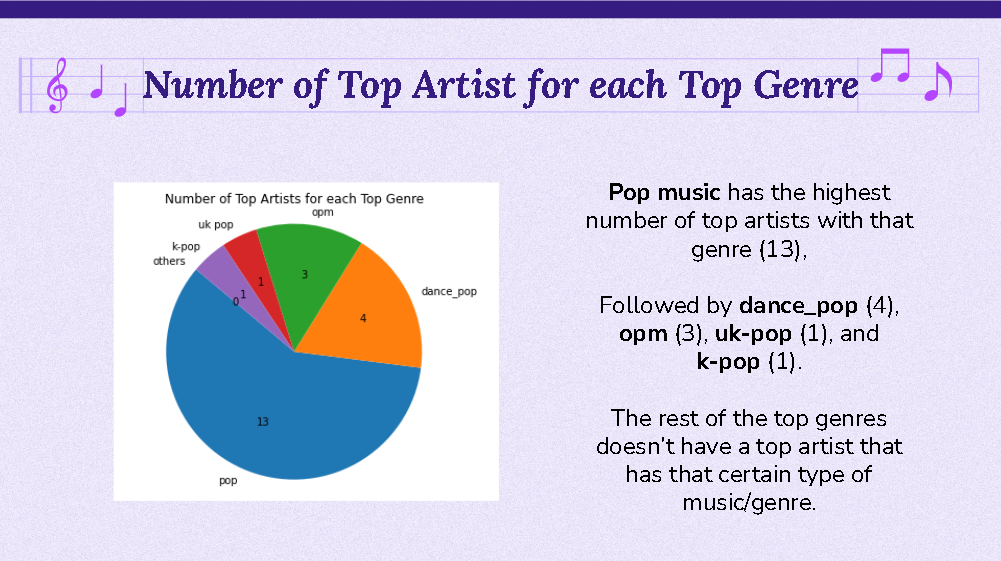

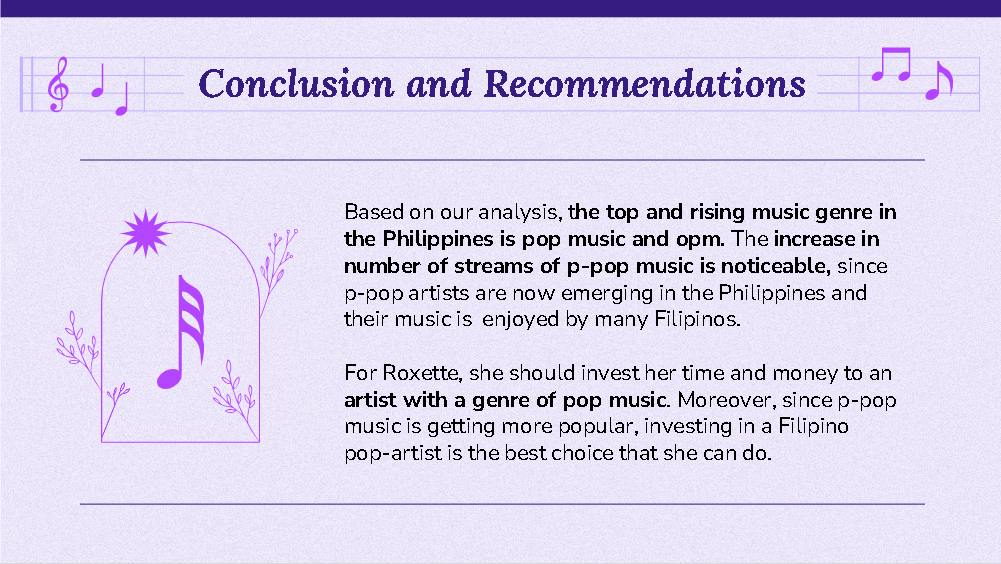